In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
#city_data.columns (['city', 'driver_count', 'type'])
#ride_data.columns (['city', 'date', 'fare', 'ride_id']')

# Combine the data into a single dataset
com_data = pd.merge(city_data, ride_data, on='city')
# Display the data table for preview
com_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Obtain the x and y coordinates for each of the three city types
urb_data      = com_data.loc[com_data['type'] =='Urban',['city','fare']]
urb_data2     = com_data.loc[com_data['type'] =='Urban',['city','driver_count']]
urb_ridecnt   = urb_data.groupby('city').count()
urb_avgfare   = urb_data.groupby('city').mean()
urb_maxdriver = urb_data2.groupby('city').max()

sub_data      = com_data.loc[com_data['type'] =='Suburban',['city','fare']]
sub_data2     = com_data.loc[com_data['type'] =='Suburban',['city','driver_count']]
sub_ridecnt   = sub_data.groupby('city').count()
sub_avgfare   = sub_data.groupby('city').mean()
sub_maxdriver = sub_data2.groupby('city').max()

rrl_data      = com_data.loc[com_data['type'] =='Rural',['city','fare']]
rrl_data2     = com_data.loc[com_data['type'] =='Rural',['city','driver_count']]
rrl_ridecnt   = rrl_data.groupby('city').count()
rrl_avgfare   = rrl_data.groupby('city').mean()
rrl_maxdriver = rrl_data2.groupby('city').max()

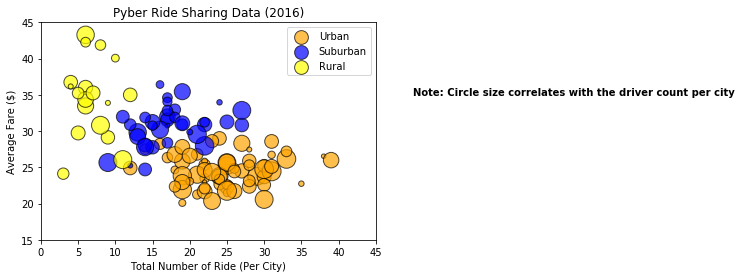

In [3]:
# Build the scatter plots for each city types
plt.scatter(urb_ridecnt, urb_avgfare, urb_maxdriver*5, marker="o", alpha = .7,facecolors="orange", edgecolors="black", label ="Urban")
plt.scatter(sub_ridecnt, sub_avgfare, urb_maxdriver*5, marker="o", alpha = .7, facecolors="blue", edgecolors="black", label ="Suburban")
plt.scatter(rrl_ridecnt, rrl_avgfare, urb_maxdriver*5,  marker="o", alpha = .7, facecolors="yellow", edgecolors="black", label ="Rural")
# Incorporate the other graph properties
plt.ylim(15,45)
plt.xlim(0,45)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Ride (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(50, 35, "Note: Circle size correlates with the driver count per city ", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.legend(loc='upper right')
plt.savefig("../Images/bubbles.png")

## Total Fares by City Type

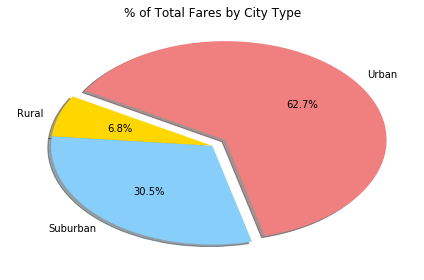

In [4]:
# Calculate Type Percents
fare_sum = com_data[['type','fare']]
fare_plot = fare_sum.groupby(['type']).sum()
labels=fare_plot.index
colors=['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.1)
plt.pie(fare_plot, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
plt.tight_layout()
plt.savefig("../Images/fares_by_city_type.png")

## Total Rides by City Type

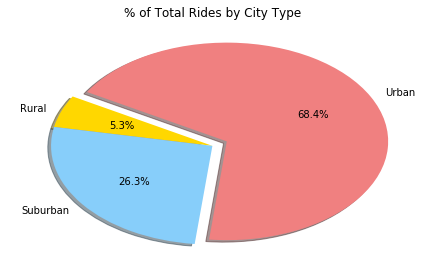

In [5]:
# Calculate Ride Percents
ride_sum = com_data[['type','city']]
ride_plot = ride_sum.groupby(['type']).count()
labels=ride_plot.index
colors=['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.1)
plt.pie(ride_plot, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('% of Total Rides by City Type')
plt.tight_layout()
plt.savefig("../Images/rides_by_city_type.png")

## Total Drivers by City Type

C:\Users\jeff\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


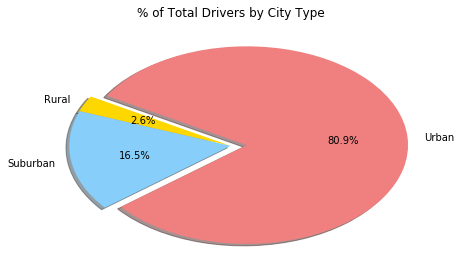

In [6]:
# Calculate Driver Percents
drive_sum = com_data[['type','city','driver_count']]
drive_sum.drop_duplicates(inplace=True)
drive_sum2 =drive_sum[['type','driver_count']]
drive_plot = drive_sum2.groupby(['type']).sum()
labels=drive_plot.index
colors=['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.1)
plt.pie(drive_plot, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('% of Total Drivers by City Type')
plt.tight_layout()
plt.savefig("../Images/drivers_by_city_type.png")